In [58]:
import pandas as pd
df=pd.read_csv('train.csv')
df.shape #891행(rows), 12열(columns)
df.columns
df.isnull().sum() #Null값의 합

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [59]:
import matplotlib.pyplot as plt
plt.rc('font',family='Malgun Gothic') # 폰트 선택ㅇ
plt.rc('font',size=11) #폰트크기 11
plt.rc('axes',unicode_minus=False) #한글 깨짐 방지


In [60]:
#사망이 전체 탑승의 몇 % // 생존이 전체 탑승의 몇 %인가?
group=df.groupby('Survived').size() # Survived로 Group을 정해 개수(size)를 정해줌
group
df.value_counts('Survived', normalize=True) #Survived 별로 Values의 개수를 정해줌 // nomalize 사용이 가능하며 전체를 1로 기준으로 얼마정도인지 표기해줌


Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

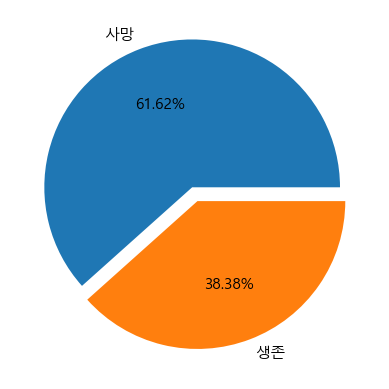

In [61]:
labels=['사망', '생존']
plt.pie(group.values,labels=labels, autopct='%.2f%%',explode=[0.05]*len(group))
plt.show()

In [62]:
import seaborn as sns

TypeError: 'Series' object is not callable

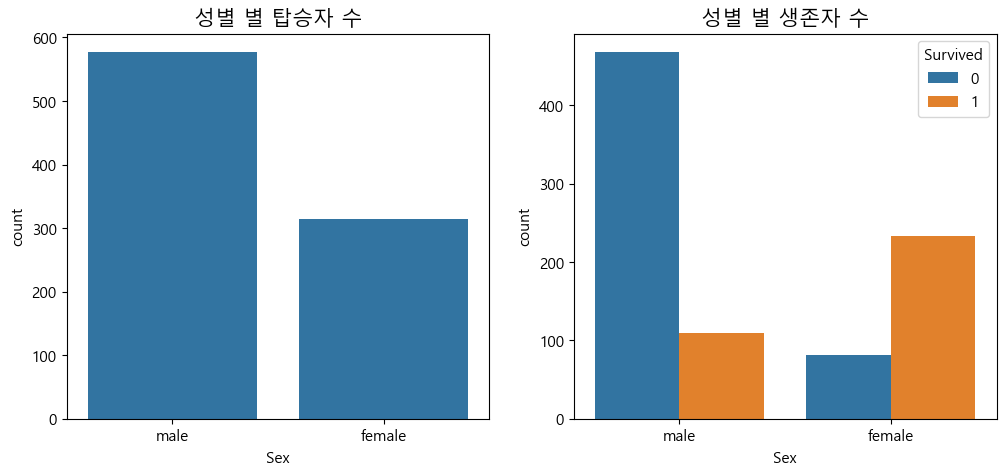

In [63]:
fig,axs=plt.subplots(1,2,figsize=(12,5))
axs[0].set_title('성별 별 탑승자 수',size=15)
sns.countplot(x='Sex',data=df,ax=axs[0])

axs[1].set_title('성별 별 생존자 수',size=15)
sns.countplot(x="Sex",hue='Survived',data=df, ax=axs[1])

# 성별 별 생존률
 #1. 성별 전체인원
gender=group('Sex').size().to_frmae('탑승인원').to_frame('생존자수')
filt = df['privivdd]' ==1]
join=gender_survived.join(gender)
j

jpin
plt.show()



In [ ]:
df['Pclass'].unique()

array([3, 1, 2])

<Axes: title={'center': '클래스 별 생존자 수'}, xlabel='Pclass', ylabel='count'>

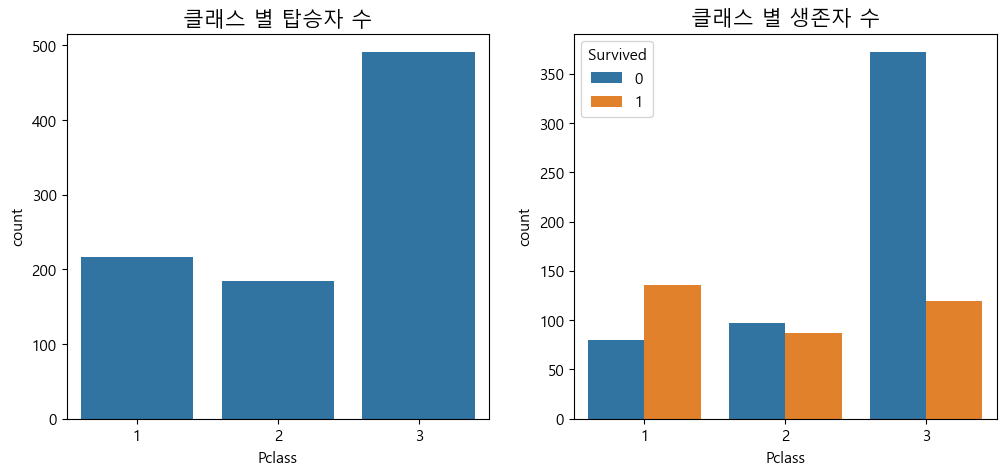

In [ ]:
fig,axs=plt.subplots(1,2,figsize=(12,5))
axs[0].set_title('클래스 별 탑승자 수',size=15)
sns.countplot(x='Pclass',data=df,ax=axs[0])

axs[1].set_title('클래스 별 생존자 수',size=15)
sns.countplot(x="Pclass",hue='Survived',data=df, ax=axs[1])

In [ ]:
Pclass=df.groupby('Pclass').size().to_frame('탑승자수') #클래스를 기준으로 의 개수 구하기
Pclass
filt=df['Survived'] ==1
Pclass_survived=df[filt].groupby('Pclass').size().to_frame('생존자수')
join=Pclass.join(Pclass_survived)
join['생존율']=join['생존자수']/join['탑승자수']*100
join

,탑승자수,생존자수,생존율
Pclass,,,
1,216,136,62.962963
2,184,87,47.282609
3,491,119,24.236253


In [65]:
sns.set_theme(font='Malgun Gothic',style='dark')

In [67]:
sns.histplot(date=df,x='Age',bins=25,kde=True) #bins-min/max간 구간을 나눔
plt.show()

ValueError: Could not interpret value `Age` for `x`. Value is a string, but `data` was not passed.

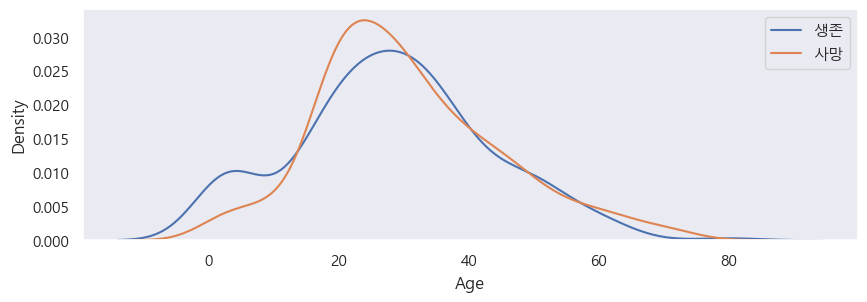

In [ ]:
#연령별 사망자와 생존자 그래프
#생존자
survived=df[df['Survived']==1] #생존자
dead=df[df['Survived']==0]#사망자
plt.figure(figsize=(10,3))
sns.kdeplot(survived['Age'], label='생존')
sns.kdeplot(dead['Age'], label='사망')
plt.legend()


In [ ]:
embarked=df.groupby('Embarked').size().to_frame('탑승항구') #항구 별 탑승자 수
embarked_survived=df[df["Survived"]==1].groupby('Embarked').size().to_frame('생존자수') #Survived가 1일때(생존일때)의 항구 탑승자 수
join=embarked.join(embarked_survived)
join['생존률']=round(join['생존자수']/join['탑승항구']*100,2)
join

,탑승항구,생존자수,생존률
Embarked,,,
C,168,93,55.36
Q,77,30,38.96
S,644,217,33.70


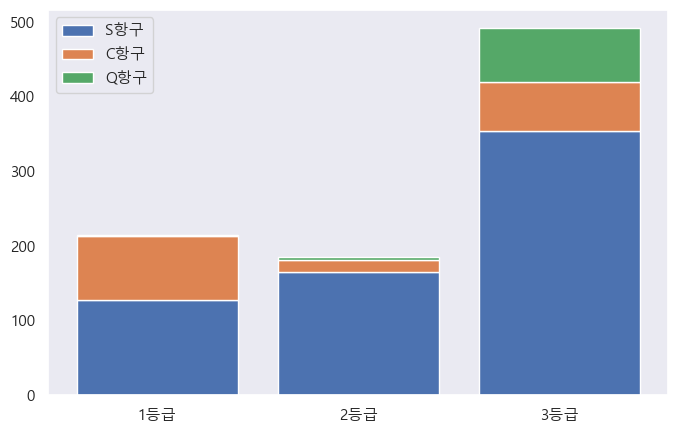

In [ ]:
c1=df[df['Pclass']==1].value_counts('Embarked') #1클래스의 티켓에 탑승한 사람 수(항구별)
c2=df[df['Pclass']==2].value_counts('Embarked') #2클래스의 티켓에 탑승한 사람 수(항구별)
c3=df[df['Pclass']==3].value_counts('Embarked') #3클래스의 티켓에 탑승한 사람 수(항구별)
pclass=pd.DataFrame([c1,c2,c3])
pclass.index=['1등급','2등급','3등급']
pclass.columns=['S 항구','C 항구','Q 항구']
fig, ax=plt.subplots(figsize=(8,5)) #_______ 표
plt.plot(kind='bar',stacked=True,ax=ax)
plt.bar(pclass.index,pclass['S 항구'],label='S항구')
plt.bar(pclass.index,pclass['C 항구'],bottom=pclass['S 항구'],label='C항구')
plt.bar(pclass.index,pclass['Q 항구'],bottom=pclass['S 항구']+pclass['C 항구'],label='Q항구')
plt.legend()


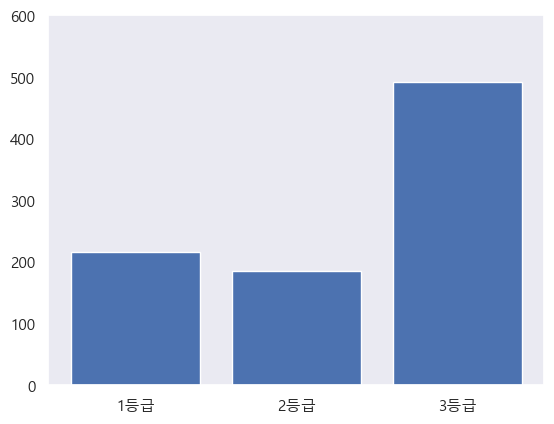

In [129]:
#1등급에 몇 명 타고 / 2등급에 몇명 타고 3등급에 몇 명탔는가?
df2=pd.read_csv('train.csv')
Pclass=df.groupby('Pclass').size().to_frame('탑승자')
Pclass
Pclass.index=(['1등급','2등급','3등급'])
plt.bar(Pclass.index,Pclass['탑승자'])
plt.ylim(0,600)
yticks=[y for y in range(0,601,50)]
plt.yticks=(yticks,[f'{y}' for y in yticks])



